In [1]:
import yahoo_fin.stock_info as si
import pandas as pd
%matplotlib inline
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
#https://algotrading101.com/learn/cluster-analysis-guide/

In [9]:
sp500_list = si.tickers_sp500()
print("Number of Tickers in S&P 500:", len(sp500_list))


Number of Tickers in S&P 500: 503


In [ ]:
sp500_historical = {}
#get_data(ticker or desired stock, start date you want data from (mm/dd/yyyy), end date or when you want data to end
#, index_as_date: {True, False} If true then the dates of the records are set as the index, else they are returned as a separate column.
#, interval: {“1d”, “1wk”, “1mo”}. Refers to the interval to sample the data: “1d”= daily, “1wk”= weekly, “1mo”=monthly.
for ticker in sp500_list:
    sp500_historical[ticker] = si.get_data(ticker, start_date="01/01/2020", index_as_date = False, interval="1d")

In [4]:
print(sp500_historical)

{'A':            date        open        high         low       close    adjclose  \
0    2020-01-02   85.900002   86.349998   85.199997   85.949997   83.347328   
1    2020-01-03   84.669998   85.330002   84.500000   84.570000   82.009117   
2    2020-01-06   84.000000   84.820000   83.599998   84.820000   82.251564   
3    2020-01-07   83.959999   85.260002   83.940002   85.080002   82.503700   
4    2020-01-08   85.959999   86.470001   85.199997   85.919998   83.318253   
...         ...         ...         ...         ...         ...         ...   
1139 2024-07-15  132.009995  133.139999  130.779999  131.009995  131.009995   
1140 2024-07-16  131.990005  136.190002  131.600006  136.059998  136.059998   
1141 2024-07-17  135.160004  136.000000  133.419998  133.500000  133.500000   
1142 2024-07-18  132.320007  135.210007  131.660004  131.970001  131.970001   
1143 2024-07-19  131.960007  132.779999  130.289993  131.779999  131.779999   

       volume ticker  
0     1410500      A  

In [5]:
data = pd.concat(sp500_historical)
data.reset_index(drop=True, inplace=True)
#reset_index basically organnizes the dataframes rows and colums so the indexs work/start from 0,1,2...n
data


,date,open,high,low,close,adjclose,volume,ticker
0,2020-01-02,85.900002,86.349998,85.199997,85.949997,83.347328,1410500,A
1,2020-01-03,84.669998,85.330002,84.500000,84.570000,82.009117,1118300,A
2,2020-01-06,84.000000,84.820000,83.599998,84.820000,82.251564,1993200,A
3,2020-01-07,83.959999,85.260002,83.940002,85.080002,82.503700,1684700,A
4,2020-01-08,85.959999,86.470001,85.199997,85.919998,83.318253,1847600,A
...,...,...,...,...,...,...,...,...
568769,2024-07-15,178.580002,180.850006,177.820007,177.979996,177.557648,2216500,ZTS
568770,2024-07-16,178.100006,183.220001,177.779999,182.910004,182.475967,1939900,ZTS
568771,2024-07-17,182.000000,184.839996,180.559998,182.050003,181.617996,2190800,ZTS
568772,2024-07-18,180.559998,184.240005,179.169998,179.229996,179.229996,2171100,ZTS


In [6]:
data = data.pivot(index='date', columns='ticker', values = 'adjclose')
data.head(5)

#index = row, adjclose is used because its a more accurate rep. of the stock's value

ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,83.347328,28.982893,72.960472,72.841965,NaN,80.065536,43.400002,196.058411,334.429993,110.811852,...,191.783951,24.695116,140.598862,54.467476,56.539856,75.651711,94.008148,139.936508,259.140015,129.515076
2020-01-03,82.009117,27.548195,72.251144,72.150558,NaN,79.089455,43.349998,195.731842,331.809998,108.861183,...,191.830887,24.737129,138.513351,54.729412,56.085320,76.096992,93.713699,139.570770,256.049988,129.534409
2020-01-06,82.251564,27.219410,72.826843,72.719955,NaN,79.503815,43.520000,194.453705,333.709991,107.582199,...,192.065552,24.686710,138.239197,54.650837,56.515942,75.604324,93.658516,138.764175,258.010010,128.539856
2020-01-07,82.503700,27.119778,72.484352,72.305099,NaN,79.061829,43.160000,190.255493,333.390015,110.029755,...,191.671295,24.527063,138.895203,54.537323,56.053421,75.320099,93.824112,138.642212,256.470001,128.974380
2020-01-08,83.318253,27.737495,73.650352,72.817558,NaN,79.384117,42.730000,190.628677,337.869995,111.023506,...,191.887207,24.619492,139.766602,54.484932,55.208107,75.575897,93.989731,140.302338,247.639999,128.694351


In [7]:
data.to_csv('S&P500_stock_data')


In [8]:
pd.set_option('display.precision', 3)
data.describe().T.head(10)
#.set_option(pat,value)

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
A,1144.0,124.179,23.057,61.451,112.773,127.613,139.183,175.759
AAL,1144.0,16.025,3.989,9.040,13.200,14.890,18.222,30.470
AAPL,1144.0,144.974,35.918,54.633,124.145,147.370,172.147,234.820
ABBV,1144.0,119.976,31.487,53.175,92.675,129.721,143.922,178.773
ABNB,906.0,141.239,27.198,82.490,118.757,143.440,160.568,216.840
ABT,1144.0,103.930,11.738,58.092,98.603,104.454,111.716,134.358
ACGL,1144.0,53.889,21.209,22.240,38.500,45.765,72.595,103.360
ACN,1144.0,277.530,52.683,134.573,245.281,280.713,311.357,398.653
ADBE,1144.0,468.281,98.525,275.200,379.368,473.330,532.382,688.370


In [9]:
#check to see if there is any missing data
data.isnull().values.any()


True

<Axes: >

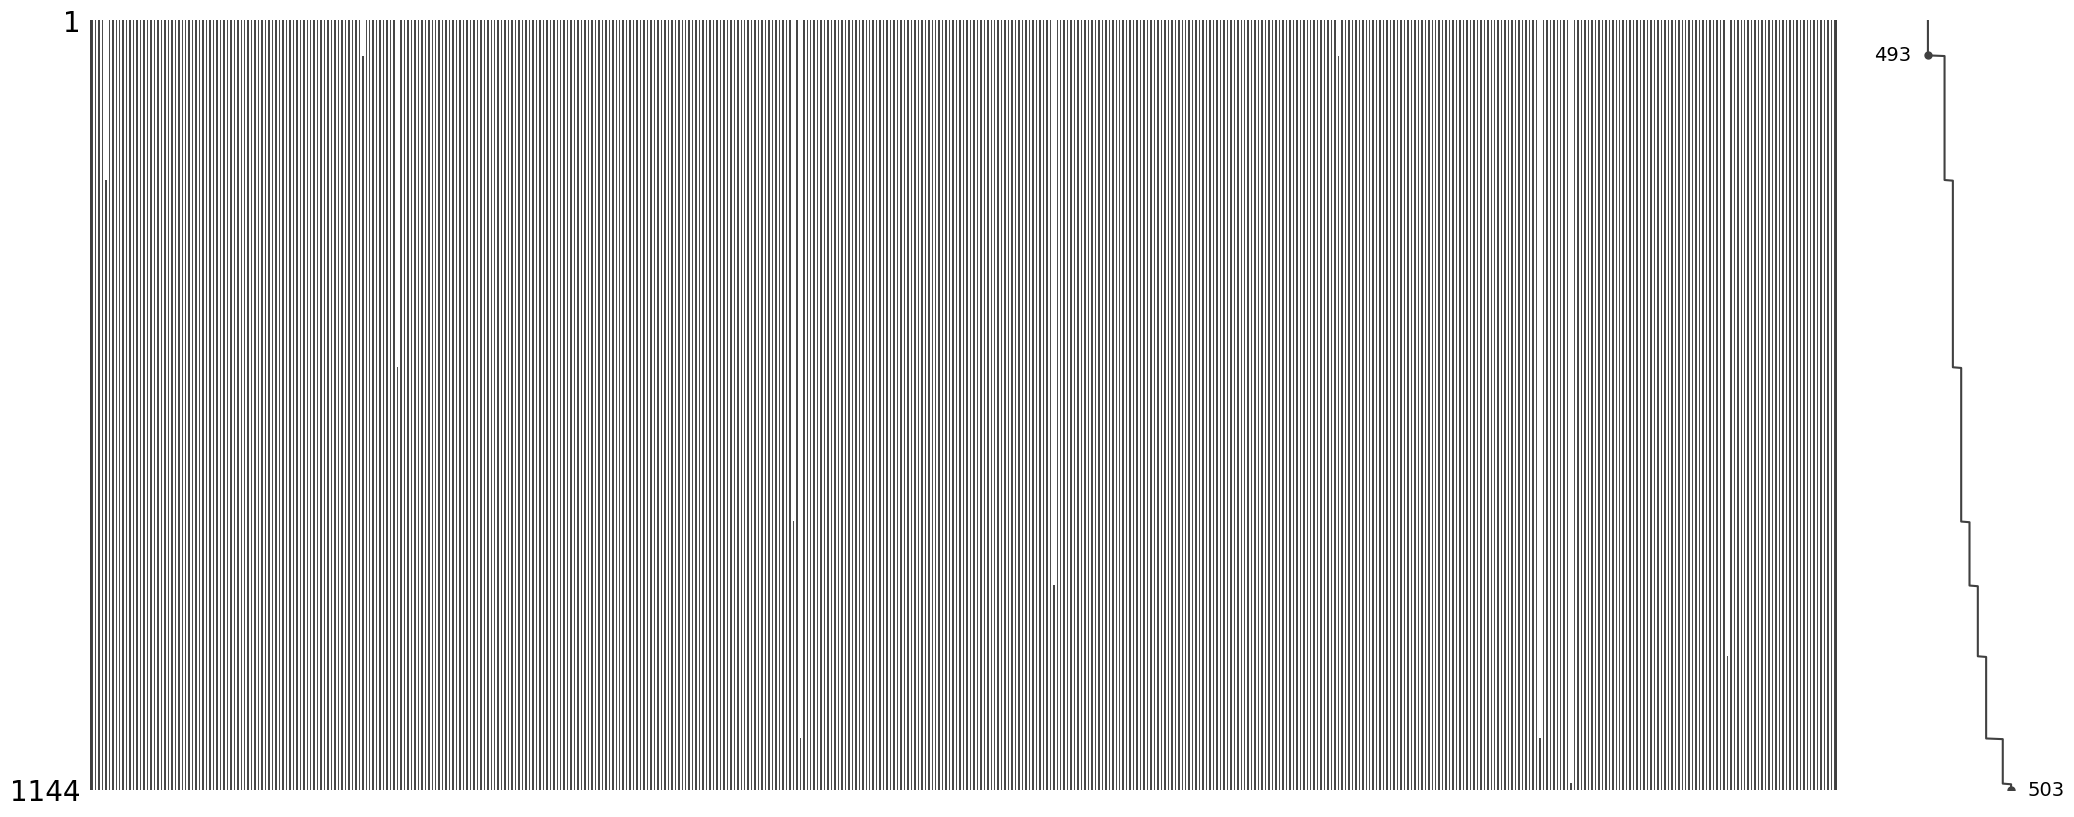

In [10]:
#find how much is missing 
import missingno
missingno.matrix(data)
#white area indicates missing info

In [11]:
#remove all col with more than 20% missing data

print('Data Shape before cleaning =', data.shape)
missing_percentage = data.isnull().mean().sort_values(ascending=False)
missing_percentage.head(10)

dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
data.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', data.shape)


Data Shape before cleaning = (1144, 503)
Data Shape after cleaning = (1144, 495)


In [12]:
#for the remaining data w/ > 20% missing, fill the missing values by the last available value in the column
data = data.fillna(method='ffill')


In [13]:
#Volatility is how much and how quickly prices move over a given span of time. For short-term/day traders
#it's a sign of opportunity but for long-term it's seen more as a risk
import numpy as np

#interested in the volatility and performance of stocks and thus we want to obtain the variance and returns 
#on an annual level

#Calculate returns and create a data frame
returns = data.pct_change().mean()*266
returns = pd.DataFrame(returns)
returns.columns = ['returns']

#Calculate the volatility
returns['volatility'] = data.pct_change().std()*np.sqrt(266)


data = returns
data.head()

,returns,volatility
ticker,,
A,0.155,0.310
AAL,-0.025,0.656
AAPL,0.318,0.335
ABBV,0.232,0.251
ABT,0.094,0.276


In [27]:
from sklearn.preprocessing import StandardScaler

#Prepare the scaler
scale = StandardScaler().fit(data)

#Fit the scaler
scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
X = scaled_data
X.head()

K = range(1, 15)
distortions = []

# Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

print(f"Length of K: {len(K)}")
print(f"Length of distortions: {len(distortions)}")

# Plot the results
fig = plt.figure(figsize=(15, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

OSError: image not already loaded

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

In [ ]:
#find optimal numebr of clusters
import kneed
from kneed import KneeLocator
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
kl.elbow

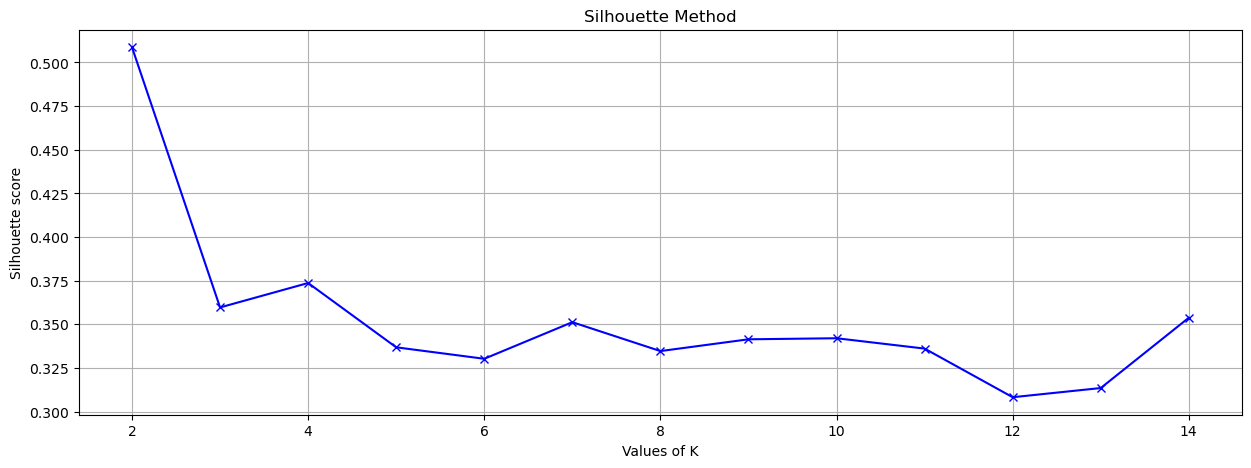

Suggested number of clusters:  3


In [73]:
from sklearn.metrics import silhouette_score

#For the silhouette method k needs to start from 2
#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. 
#Higher silhouette scores indicate better-defined clusters.

K = range(2,15) #range of possible clusters
silhouettes = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    #n_clusters=k: The number of clusters.
    #random_state=42: A seed for reproducibility.
    #n_init=10: Number of times the K-Means algorithm will be run with different centroid seeds.
    #init='random': Random initialization of the centroids.
    
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
print('Suggested number of clusters: ', kl.elbow)

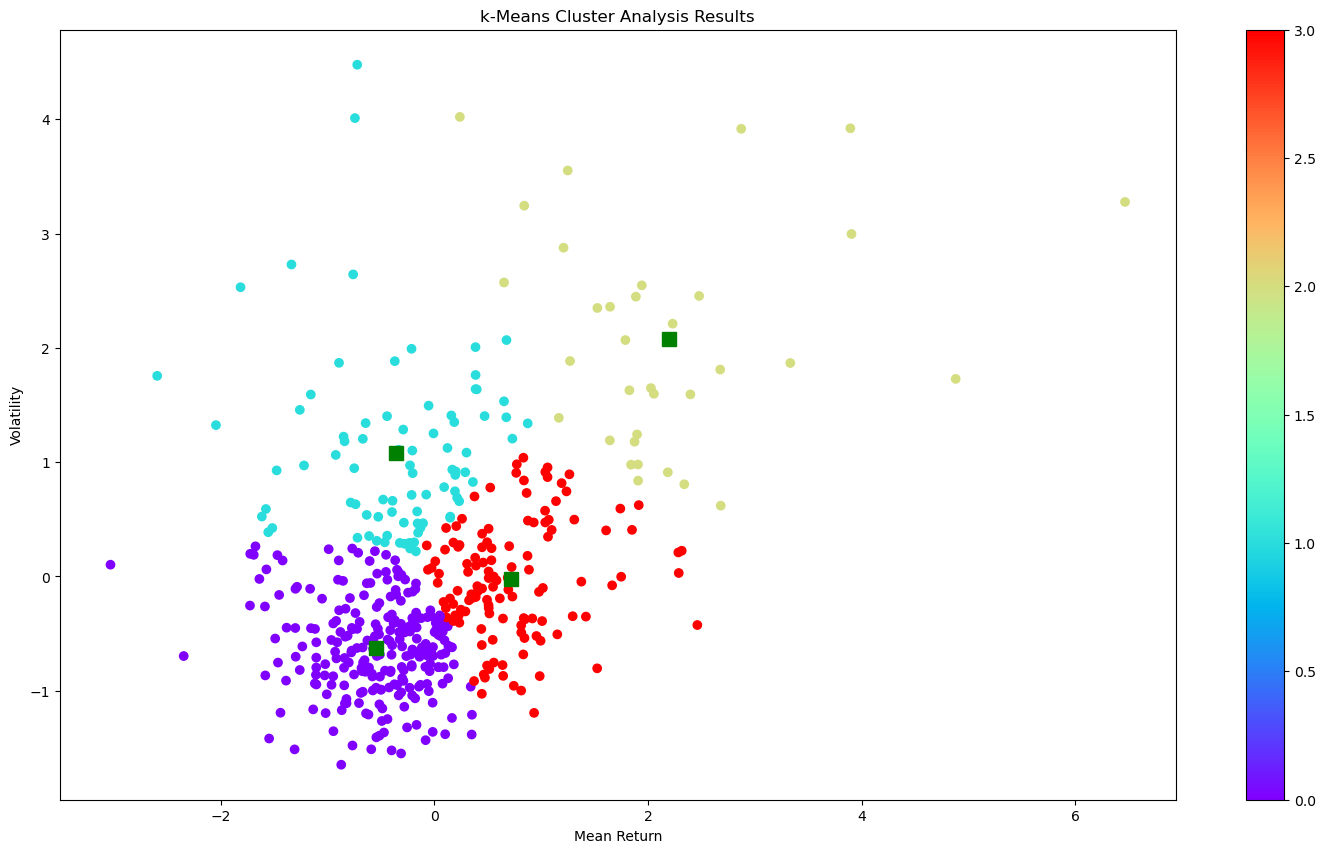

In [158]:
c = 4
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

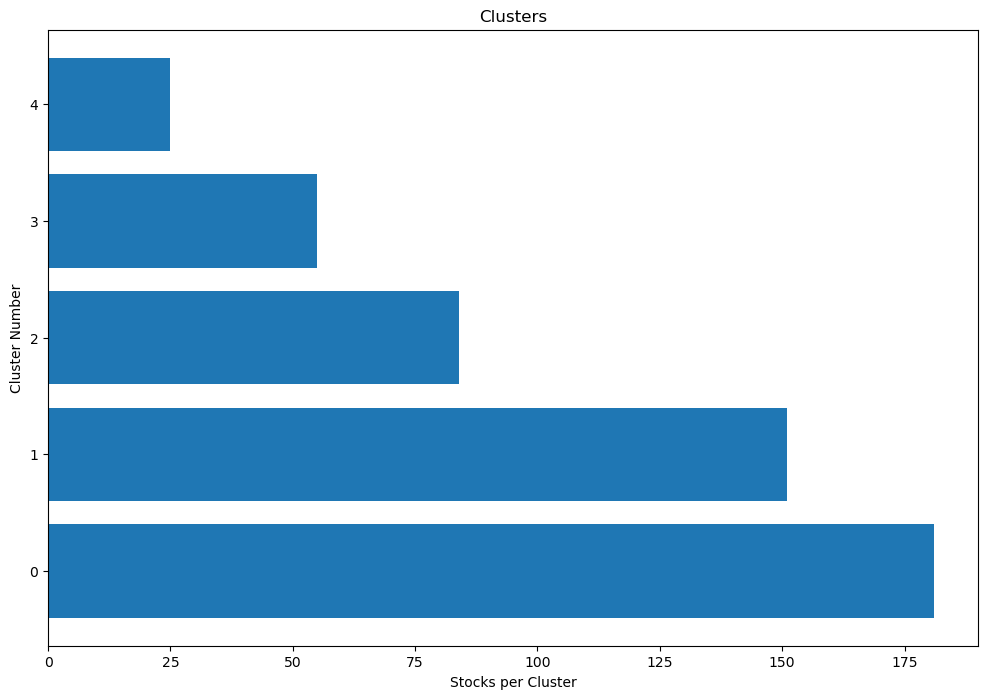

In [78]:
#how many instances each cluster has
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()

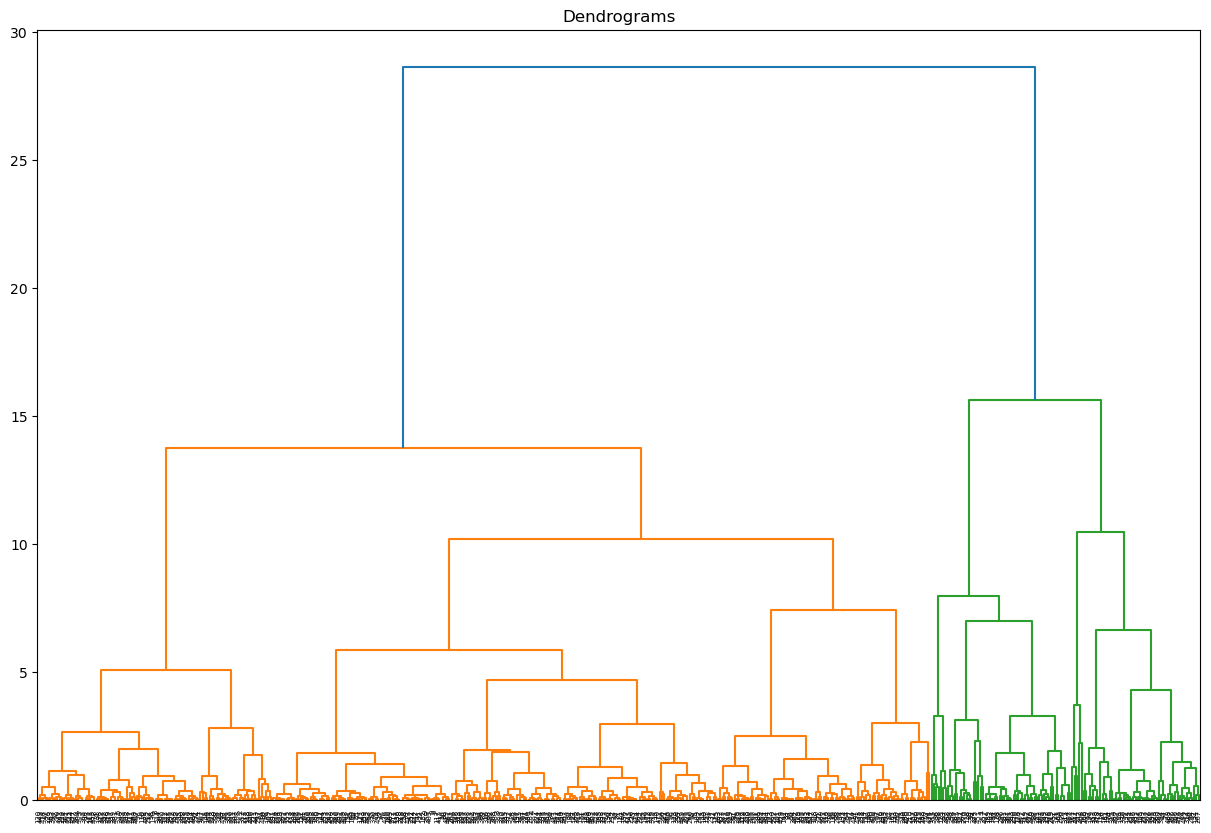

In [159]:
#minimize the variance distance between our clusters we shall go with Ward’s linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

#Here we can see the dendrogram where the x-axis is represented by our stocks and the y-axis represents 
#the distance between them. The vertical line with maximum distance (blue) shows the cluster threshold.

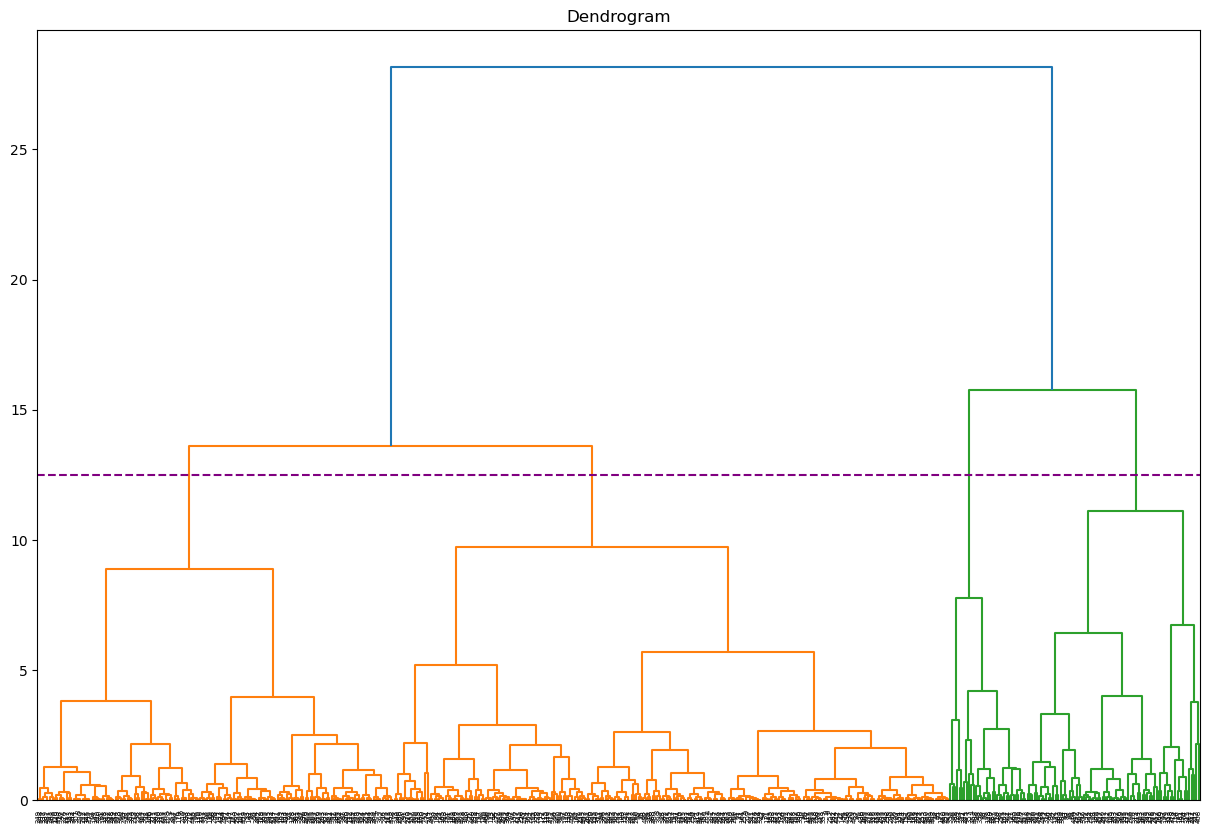

In [82]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=12.5, color='purple', linestyle='--')

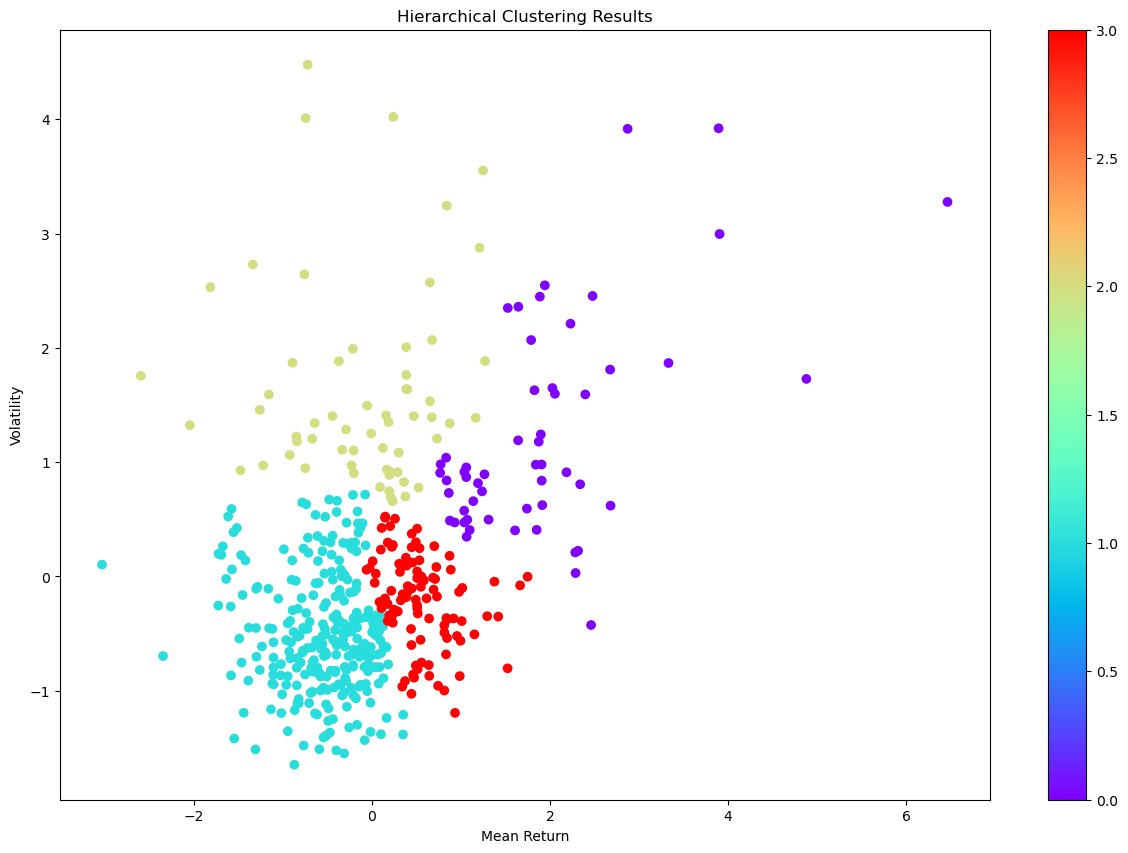

In [160]:
#Fit the model
clusters = 4
hc = AgglomerativeClustering(n_clusters= clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()


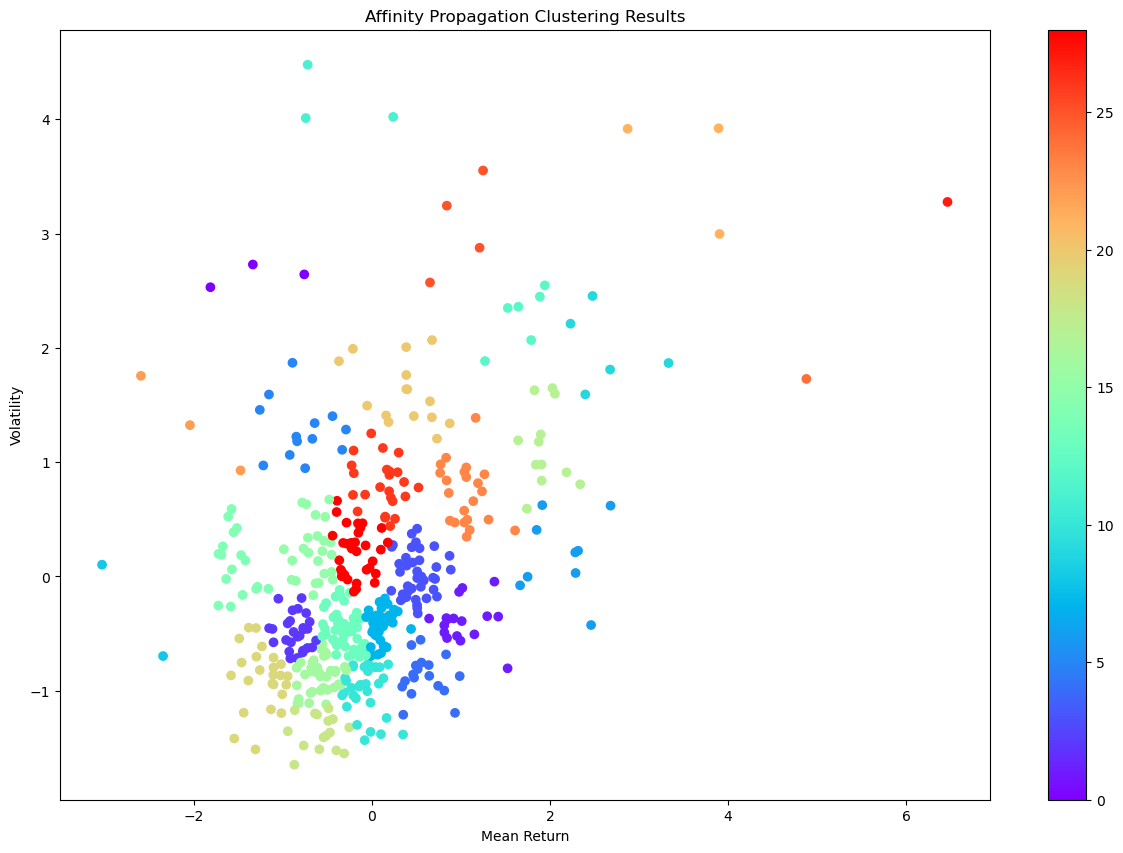

In [161]:
from sklearn.cluster import AffinityPropagation

#Fit the model
ap = AffinityPropagation()
ap.fit(X)
labels1 = ap.predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels1, cmap='rainbow')
ax.set_title('Affinity Propagation Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

The number of clusters is: 31


<Figure size 640x480 with 0 Axes>

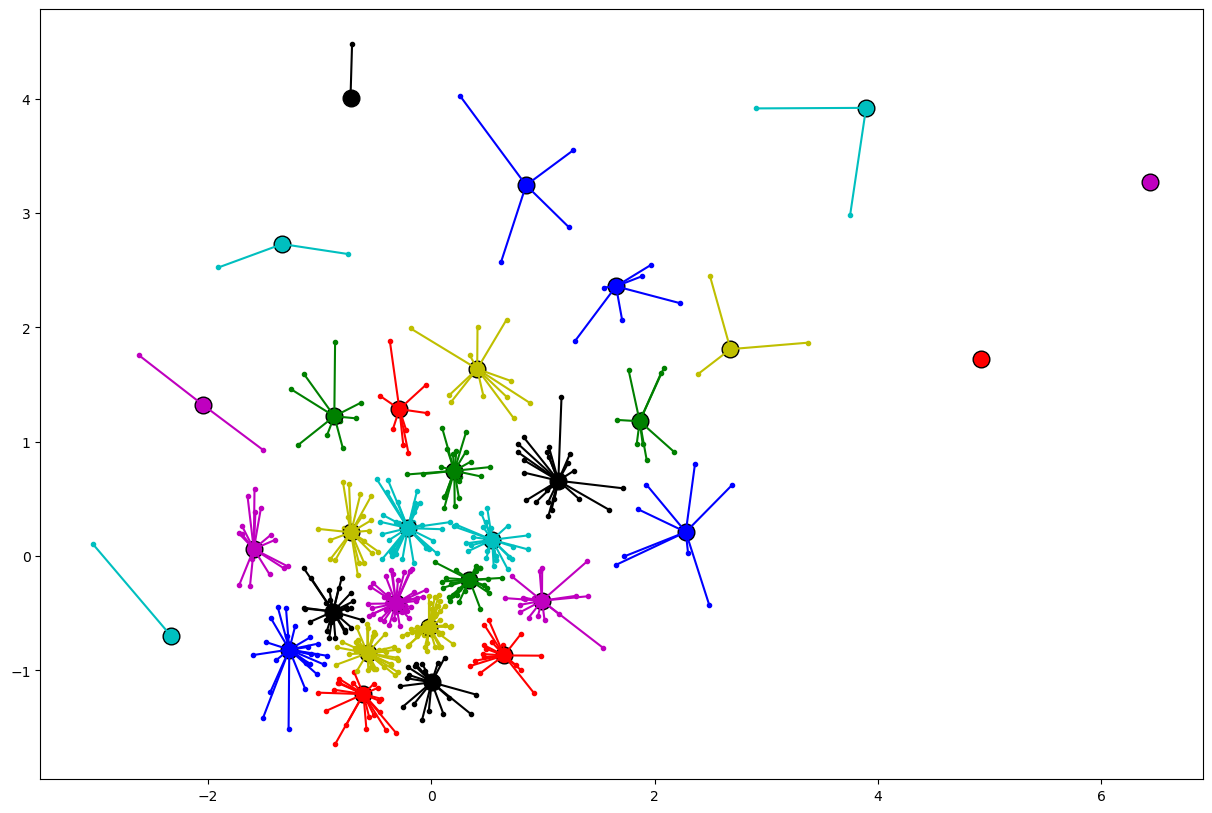

In [85]:
#obtain their number of clusters and arrange them for a better look. 
#We will do this by taking the cluster center indices and labels and plotting them
from itertools import cycle

#Extract the cluster centers and labels
cci = ap.cluster_centers_indices_
labels2 = ap.labels_

#Print their number
clusters = len(cci)
print('The number of clusters is:',clusters)

#Plot the results
X_ap = np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf
fig=plt.figure(figsize=(15,10))
colors = cycle('cmykrgbcmykrgbcmykrgbcmykrgb')
for k, col in zip(range(clusters),colors):
    cluster_members = labels2 == k
    cluster_center = X_ap[cci[k]]
    plt.plot(X_ap[cluster_members, 0], X_ap[cluster_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
    for x in X_ap[cluster_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [162]:
#compare different models to see which was best
print("k-Means Clustering", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("Hierarchical Clustering", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("Affinity Propagation Clustering", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

k-Means Clustering 0.37361417316167034
Hierarchical Clustering 0.3026347089027566
Affinity Propagation Clustering 0.3445749768303449


In [166]:
data1 = pd.read_csv('S&P500_stock_data')
data1 = data1.fillna(method='ffill')

In [167]:
cluster_size_limit = 1000
counts = clustered_series.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())


#from quantopian
def find_coint_pairs(data, significance=0.05):
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

Number of clusters: 5
Number of Pairs: 65772


In [178]:
#look for the cointegrated pairs within clusters and return them
from statsmodels.tsa.stattools import coint

cluster_dict = {}

for i, clust in enumerate(ticker_count.index):
    tickers = clustered_series[clustered_series == clust].index
    print(f"Processing cluster {clust} with tickers: {tickers}")

    if not set(tickers).issubset(data1.columns):
        raise KeyError(f"Tickers {set(tickers) - set(data1.columns)} are not in the columns of data1")
    
    # Handle missing data by filling NaNs with column mean
    data_subset = data1[tickers].fillna(data1[tickers].mean())
    
    
    score_matrix, pvalue_matrix, pairs = find_coint_pairs(data_subset)
    cluster_dict[clust] = {}
    cluster_dict[clust]['score_matrix'] = score_matrix
    cluster_dict[clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[clust]['pairs'] = pairs
    
pairs = []   
for cluster in cluster_dict.keys():
    pairs.extend(cluster_dict[cluster]['pairs'])

    
print("-------------------------------")
print("-------------------------------")
print ("Number of pairs:", len(pairs))
print ("In those pairs, we found %d unique tickers." % len(np.unique(pairs)))
print(pairs)


Processing cluster 1 with tickers: Index(['A', 'AAPL', 'ABBV', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'AFL',
       ...
       'VRSK', 'VRTX', 'WAB', 'WM', 'WMB', 'WMT', 'WRB', 'WST', 'XOM', 'XYL'],
      dtype='object', name='ticker', length=181)
Processing cluster 3 with tickers: Index(['ABT', 'AEE', 'AEP', 'AKAM', 'ALLE', 'AMCR', 'AMGN', 'AMT', 'AON',
       'APD',
       ...
       'VTRS', 'VZ', 'WAT', 'WBA', 'WEC', 'WTW', 'XEL', 'YUM', 'ZBH', 'ZTS'],
      dtype='object', name='ticker', length=151)
Processing cluster 0 with tickers: Index(['AAL', 'ADSK', 'AES', 'AIG', 'ALB', 'ALGN', 'APTV', 'BA', 'BBY', 'BEN',
       'BIIB', 'BKR', 'C', 'CCL', 'CF', 'CFG', 'COF', 'CRL', 'CRM', 'CTLT',
       'DAL', 'DAY', 'DLTR', 'DRI', 'EPAM', 'EXPE', 'F', 'FITB', 'FRT', 'GL',
       'GM', 'GNRC', 'HAL', 'HBAN', 'HST', 'INTC', 'IVZ', 'KEY', 'KIM', 'KMX',
       'LKQ', 'LULU', 'LUV', 'LVS', 'LYB', 'LYV', 'MAR', 'MGM', 'MHK', 'MOS',
       'MTB', 'MTCH', 'OKE', 'PARA', 'PAYC', 'PCG', 'PODD', '

In [179]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

stocks = np.unique(pairs)
X_data = pd.DataFrame(index=X.index, data=X).T
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_data.T.loc[stocks]
X_pairs.head()

,returns,volatility
ticker,,
A,-0.206,-0.639
AAL,-1.338,2.729
ABT,-0.546,-0.973
ADSK,-0.152,0.383
AES,-0.611,0.354


In [180]:
X_tsne = TSNE(learning_rate=30, perplexity=5, random_state=42, n_jobs=-1).fit_transform(X_pairs)
X_tsne

/Users/divitpurwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[-46.660503  ,   3.900799  ],
       [ 10.173099  ,  23.827932  ],
       [-42.150707  ,  -2.329765  ],
       [  3.7054727 , -11.065493  ],
       [ -5.440126  ,  -3.705544  ],
       [ 30.298615  ,   2.148413  ],
       [ 25.631334  ,   7.6885724 ],
       [-32.220592  ,   0.21912183],
       [ 32.609745  , -18.464993  ],
       [ 33.919975  , -17.65136   ],
       [  8.605899  ,  14.771517  ],
       [ -5.766382  ,  -6.3892717 ],
       [ -7.4244    ,  -5.1533456 ],
       [  8.246934  ,  13.220163  ],
       [ 26.041248  ,  -9.965028  ],
       [-22.377174  ,   2.887782  ],
       [ 31.459229  , -20.26594   ],
       [ 24.454777  , -13.740737  ],
       [ 18.854912  ,   1.4084806 ],
       [ 24.46281   ,  -9.149235  ],
       [-35.63541   ,  -0.9248578 ],
       [  2.2171233 , -11.485023  ],
       [ 17.108484  , -14.882778  ],
       [-39.545765  ,  -2.4084442 ],
       [ 20.089582  ,   3.7811694 ],
       [-38.83995   ,   7.3483715 ],
       [  6.552199  ,  13.873867  ],
 

/var/folders/60/4nmmb7v946sbdb31fgwl008c0000gn/T/ipykernel_39753/3774293952.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='b');


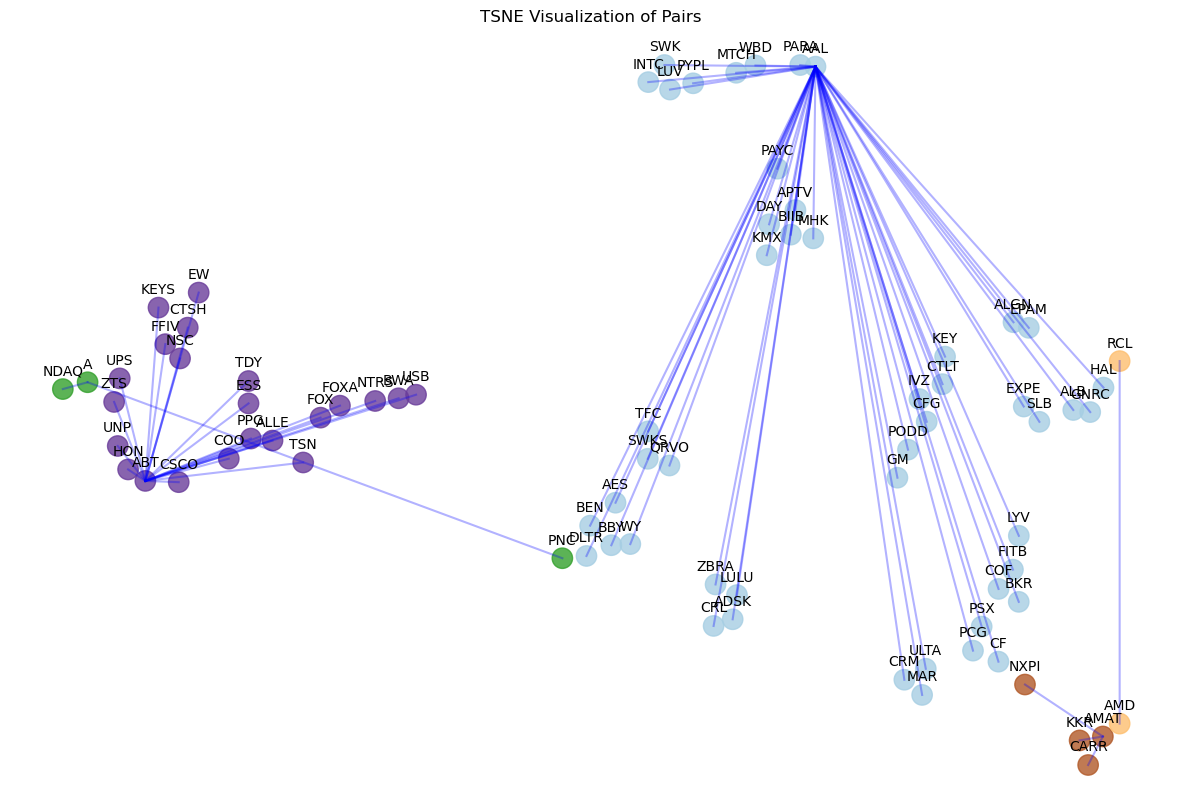

In [181]:
plt.figure(1, facecolor='white',figsize=(15,10))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='b');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Visualization of Pairs'); 

# Join pairs by x and y
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.show()